In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/traffic.csv")
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [ ]:
df.isnull().sum()

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


In [ ]:
df.duplicated().sum()

0

1) Vehicle Distribution Analysis:

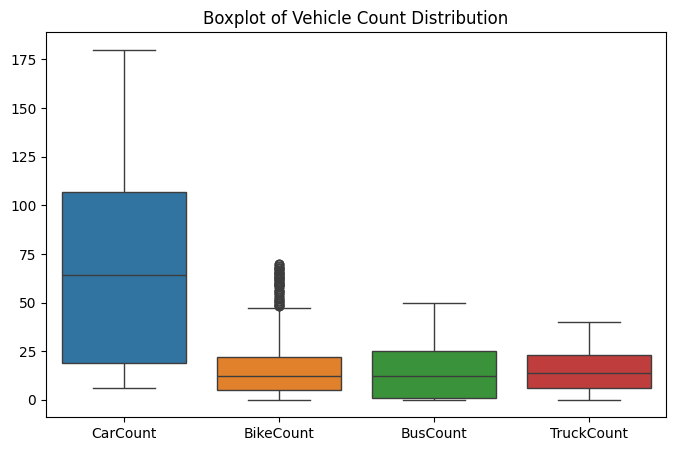

In [ ]:
#using Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[["CarCount", "BikeCount", "BusCount", "TruckCount"]])
plt.title("Boxplot of Vehicle Count Distribution")
plt.show()



<ipython-input-35-494e07f6215b>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


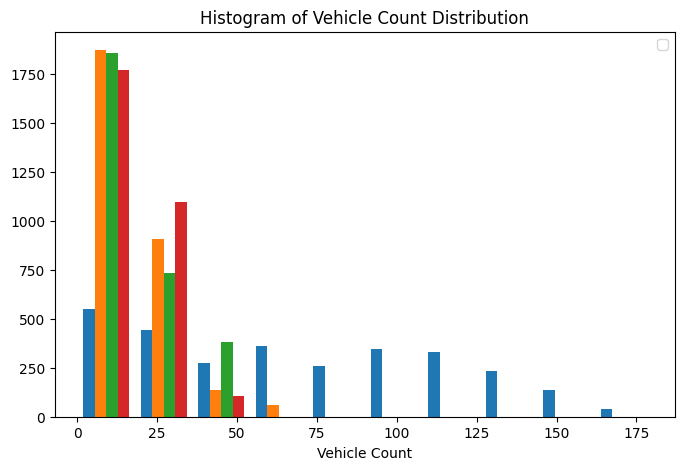

In [ ]:
# Using Histogram
plt.figure(figsize=(8, 5))
plt.hist(df[["CarCount", "BikeCount", "BusCount", "TruckCount"]], bins=10)
plt.title("Histogram of Vehicle Count Distribution")
plt.xlabel("Vehicle Count")
plt.legend()
plt.show()


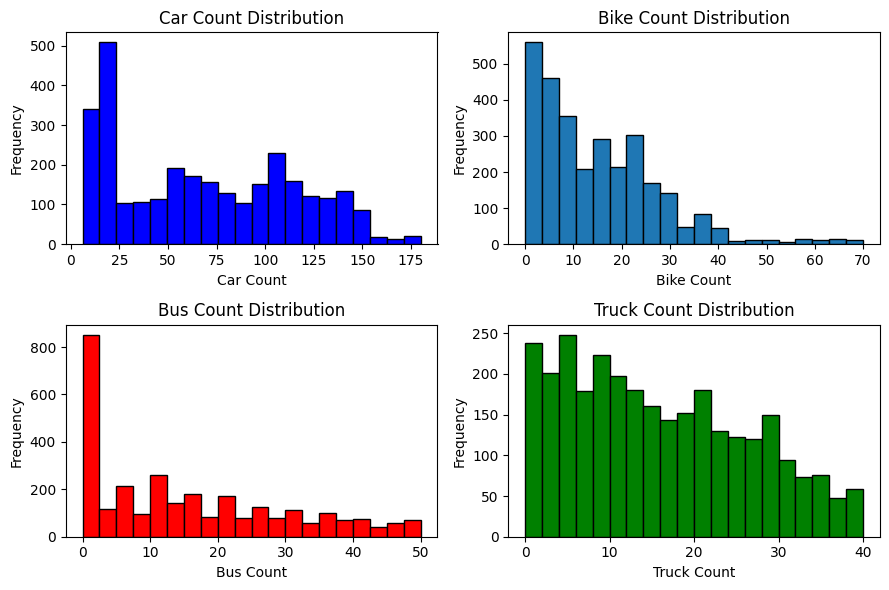

In [ ]:
plt.figure(figsize=(9,6))

plt.subplot(2, 2, 1)
plt.hist(df['CarCount'], bins=20, color='blue', edgecolor='black')
plt.title('Car Count Distribution')
plt.xlabel('Car Count')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(df['BikeCount'],bins=20,edgecolor='black')
plt.title('Bike Count Distribution')
plt.xlabel('Bike Count')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(df['BusCount'], bins=20, color='red', edgecolor='black')
plt.title('Bus Count Distribution')
plt.xlabel('Bus Count')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(df['TruckCount'], bins=20,color='green', edgecolor='black')
plt.title('Truck Count Distribution')
plt.xlabel('Truck Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

2) Traffic Situation Distribution:

In [ ]:
df['Traffic Situation'].value_counts()

,count
Traffic Situation,
normal,1669
heavy,682
high,321
low,304


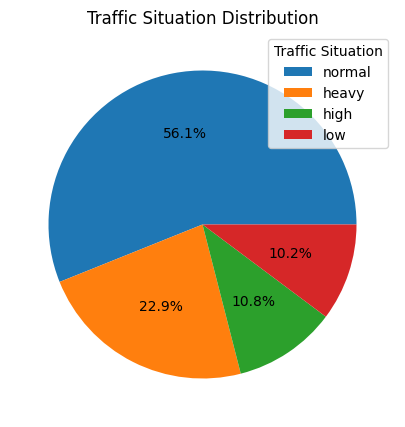

In [ ]:
#using pie chart
plt.figure(figsize=(9, 5))
traffic_situation_counts = df["Traffic Situation"].value_counts()
label=traffic_situation_counts.index
plt.pie(traffic_situation_counts, autopct='%1.1f%%')
plt.title("Traffic Situation Distribution")
plt.legend(label, title="Traffic Situation")
plt.show()

3) Variation by Day of the Week:


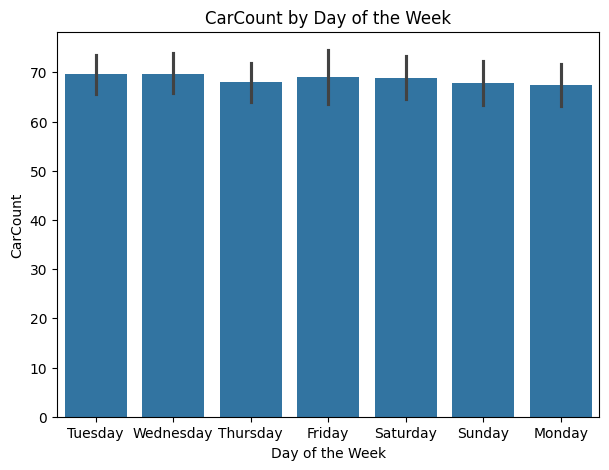

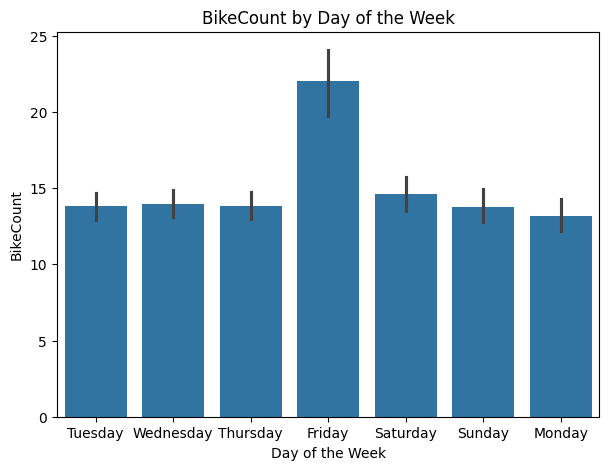

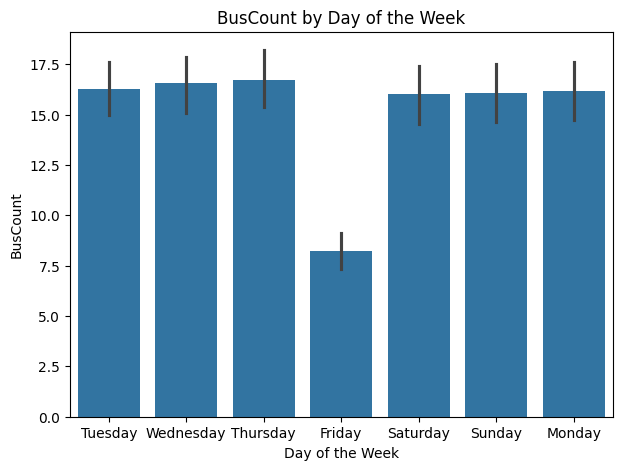

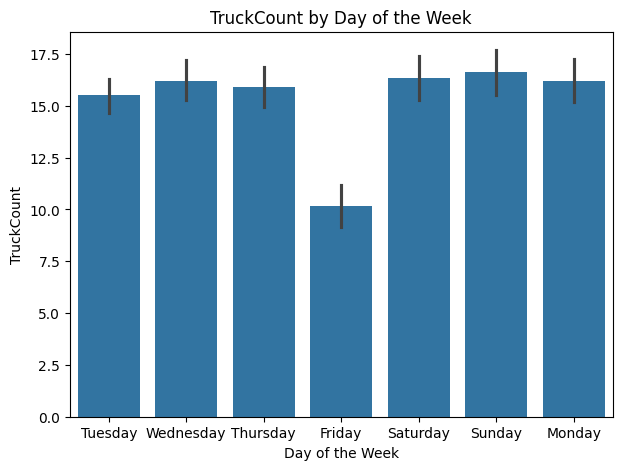

In [18]:
# there is already a day of the week column so i used it and when i extract the day from the Time column it only shows Sunday
# Plotting the vehicle counts by day of the week using bar plots
#df['Day'] = pd.to_datetime(df['Time']).dt.day_name()
vehicles=['CarCount','BikeCount','BusCount','TruckCount']
for vehicle in vehicles:

 plt.figure(figsize=(7, 5))
 sns.barplot(x='Day of the week', y=vehicle, data=df)
 plt.title(vehicle+' by Day of the Week')
 plt.xlabel('Day of the Week')
 plt.ylabel(vehicle)
 plt.show()


4) Car Count vs. Traffic Situation:

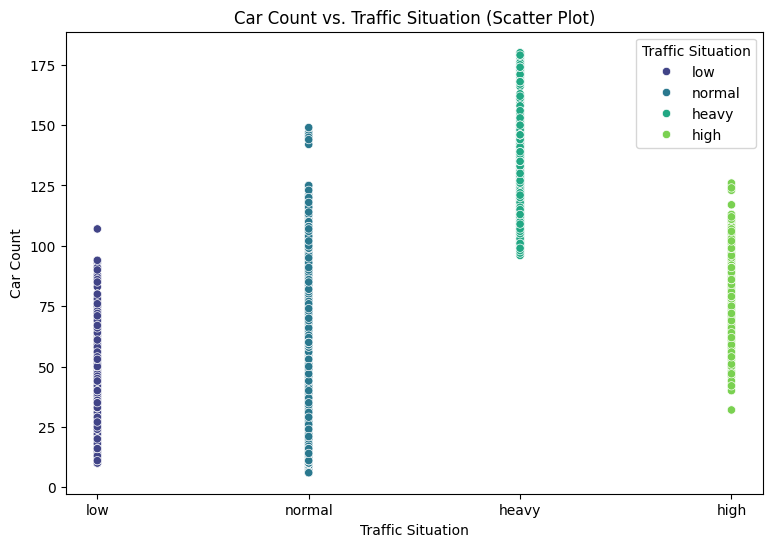

<ipython-input-65-93c0a55cd37f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Traffic Situation', y='CarCount', data=df, palette='viridis')


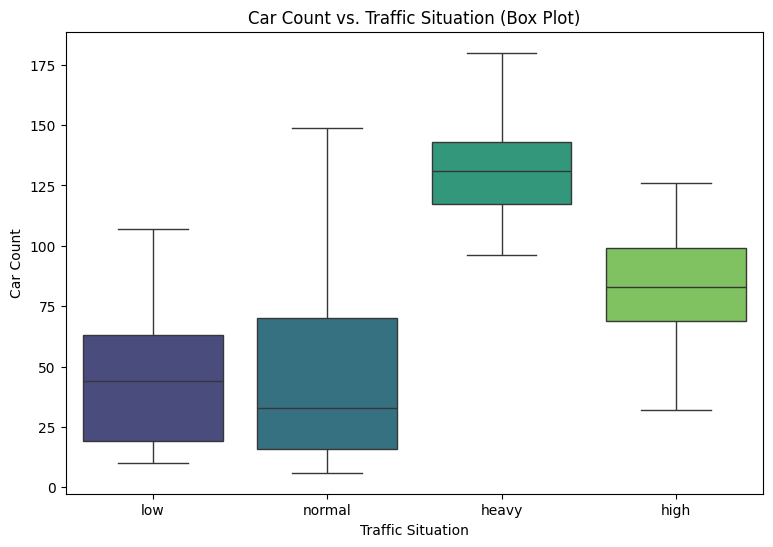

In [ ]:
# Create scatter plot
plt.figure(figsize=(9, 6))
sns.scatterplot(x='Traffic Situation', y='CarCount', data=df, hue='Traffic Situation', palette='viridis')
plt.title('Car Count vs. Traffic Situation (Scatter Plot)')
plt.xlabel('Traffic Situation')
plt.ylabel('Car Count')
plt.show()

# Create boxplot
plt.figure(figsize=(9, 6))
sns.boxplot(x='Traffic Situation', y='CarCount', data=df, palette='viridis')
plt.title('Car Count vs. Traffic Situation (Box Plot)')
plt.xlabel('Traffic Situation')
plt.ylabel('Car Count')
plt.show()


5) Bike Count vs. Traffic Situation:

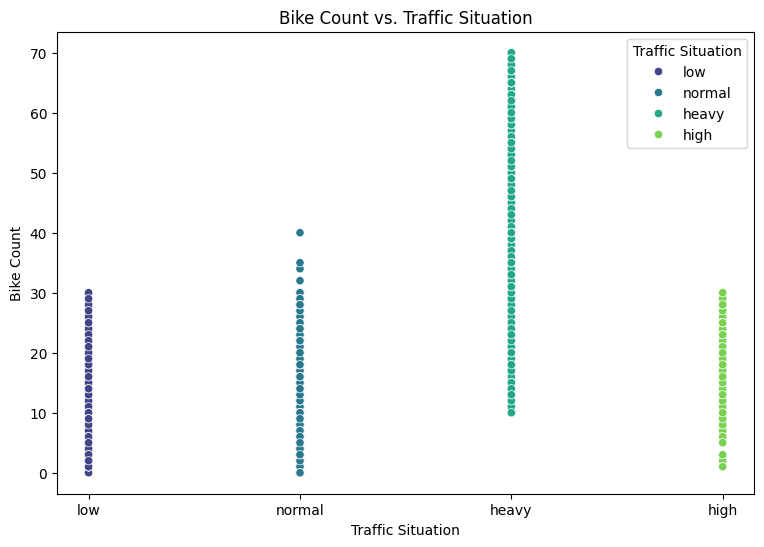

In [21]:
#using scatter plot
plt.figure(figsize=(9, 6))
sns.scatterplot(x='Traffic Situation', y='BikeCount', data=df, hue='Traffic Situation', palette='viridis')
plt.title('Bike Count vs. Traffic Situation')
plt.xlabel('Traffic Situation')
plt.ylabel('Bike Count')
plt.show()

6) Bus Count vs. Traffic Situation:

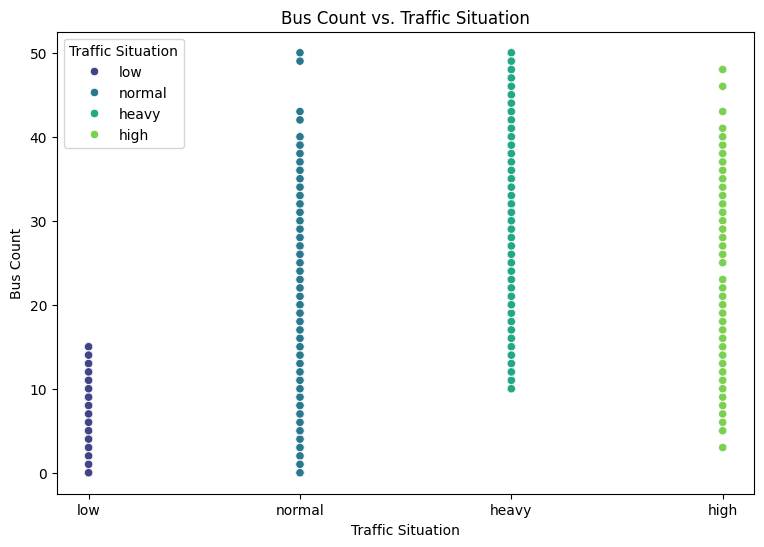

In [22]:
#using scatter plot
plt.figure(figsize=(9, 6))
sns.scatterplot(x='Traffic Situation', y='BusCount', data=df, hue='Traffic Situation', palette='viridis')
plt.title('Bus Count vs. Traffic Situation')
plt.xlabel('Traffic Situation')
plt.ylabel('Bus Count')
plt.show()

7) Truck Count vs. Traffic Situation:

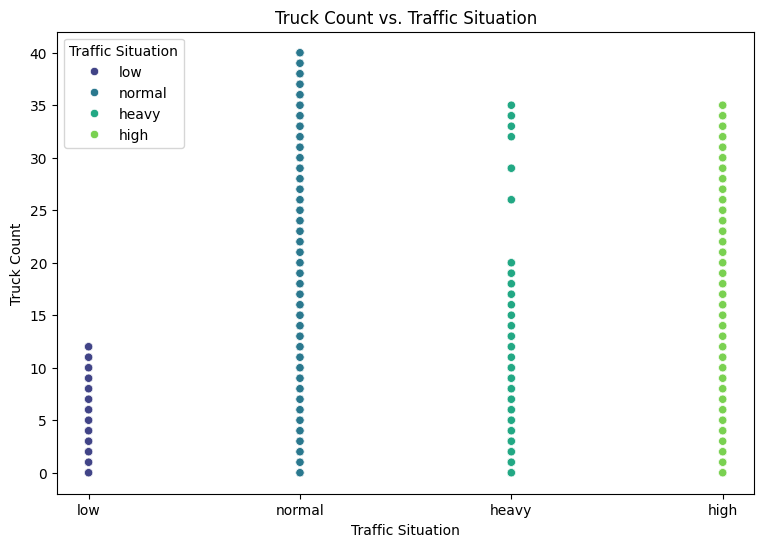

In [23]:
#using scatter plot
plt.figure(figsize=(9, 6))
sns.scatterplot(x='Traffic Situation', y='TruckCount', data=df, hue='Traffic Situation', palette='viridis')
plt.title('Truck Count vs. Traffic Situation')
plt.xlabel('Traffic Situation')
plt.ylabel('Truck Count')
plt.show()

8) Total Vehicle and Count Traffic Situation:

<ipython-input-26-323de6f3ef58>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Traffic Situation', y='Total', data=total_by_traffic_situation, palette='viridis')


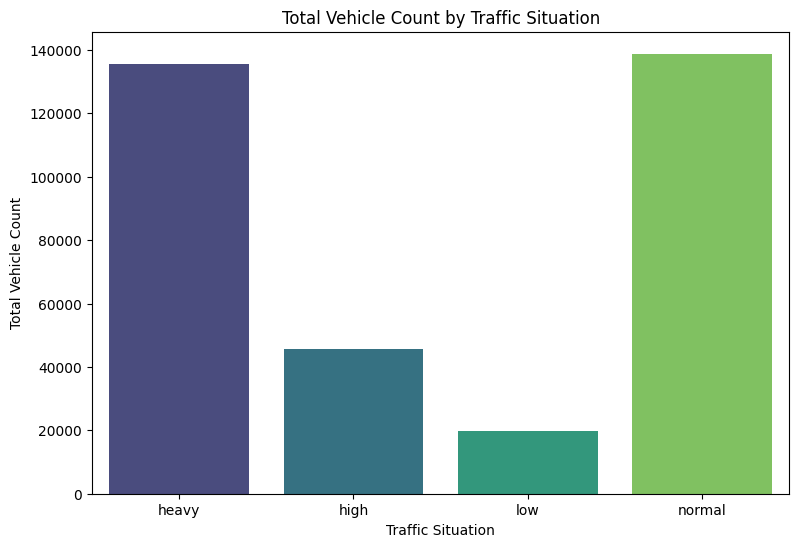

In [26]:
# Group the data by Traffic Situation and calculate the total vehicle count for each
total_by_traffic_situation = df.groupby('Traffic Situation')['Total'].sum().reset_index()

plt.figure(figsize=(9, 6))
sns.barplot(x='Traffic Situation', y='Total', data=total_by_traffic_situation, palette='viridis')
plt.title('Total Vehicle Count by Traffic Situation')
plt.xlabel('Traffic Situation')
plt.ylabel('Total Vehicle Count')
plt.show()

In [25]:
total_by_traffic_situation

,Traffic Situation,Total
0,heavy,135622
1,high,45721
2,low,19758
3,normal,138813


9) Busiest Hours of the Day:

<ipython-input-35-a3592ae56559>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hour', y='Total', data=total_by_hour, palette='viridis')


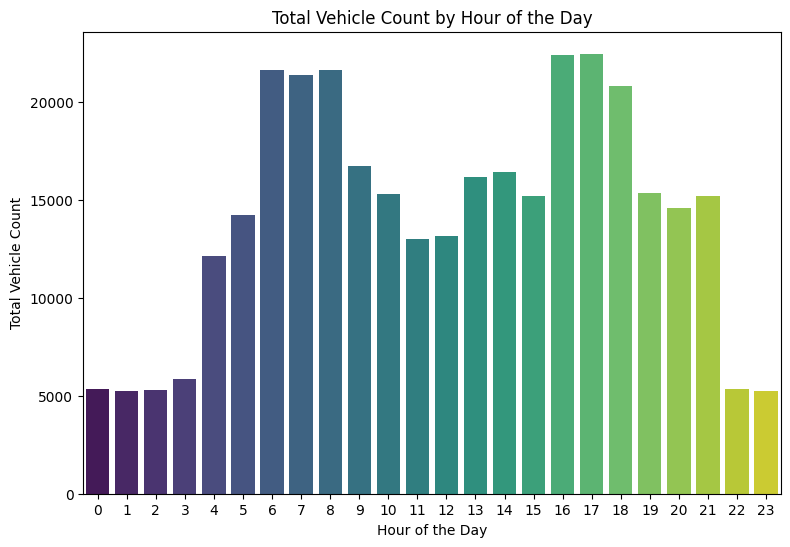

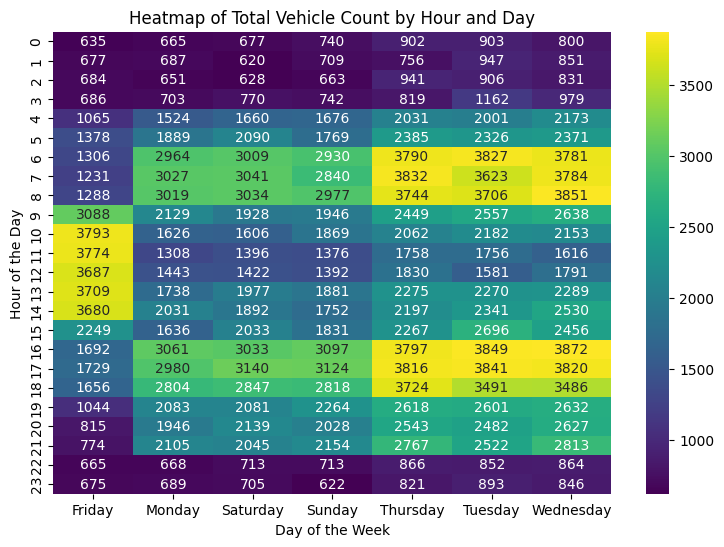

In [35]:
from dateutil import parser
# Extract the hour from the Time column using dateutil.parser
df['Hour'] = df['Time'].apply(lambda x: parser.parse(x).hour)

# Group by the hour and calculate the total vehicle count for each hour
total_by_hour = df.groupby('Hour')['Total'].sum().reset_index()

# Plotting the total vehicle count by hour using a bar chart
plt.figure(figsize=(9, 6))
sns.barplot(x='Hour', y='Total', data=total_by_hour, palette='viridis')
plt.title('Total Vehicle Count by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Vehicle Count')
plt.show()

# Plotting the total vehicle count by hour and day using a heatmap
heatmap_data = df.pivot_table(index='Hour', columns='Day of the week', values='Total', aggfunc='sum')
plt.figure(figsize=(9, 6))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='g')
plt.title('Heatmap of Total Vehicle Count by Hour and Day')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()